In [7]:
from fast_cleaning import fast_cleaning_longer, fast_cleaning_merge
from cleaning_old_longer import cleaning_old_longer
from cleaning_old_merge import cleaning_old_merge
from validation import get_efficiency, get_fake_rate
from coating_cleaning import coating_cleaning
from matplotlib import pyplot as plt
from get_data import *
from time import time
import pandas as pd
import matplotlib
import os


Create variables for analyse

In [2]:
path = "data/selecting_pri_and_sec"
event_list = os.listdir(path)
cleaning_type_list = ["cleaning_old_longer",
                      "cleaning_old_merge",
                      "fast_cleaning_longer",
                      "fast_cleaning_merge",
                      "coating_cleaning"]

cleaning_func_list = [cleaning_old_longer,
                      cleaning_old_merge,
                      fast_cleaning_longer,
                      fast_cleaning_merge,
                      coating_cleaning]
plot_title = ["Efficiency", "Cleaning efficiency/Raw efficiency", "Number of tracks left", "Time", "Fake rate"]

Create data objects for store information

In [3]:
event_list = [event_list[i:i + 2] for i in range(0, len(event_list), 2)]
df_efficiency = pd.DataFrame(columns=cleaning_type_list.append("raw"))
df_time = pd.DataFrame(columns=cleaning_type_list)
df_fake_rate = pd.DataFrame(columns=cleaning_type_list)
df_tracks_number = pd.DataFrame(columns=cleaning_type_list)

Collect statistics of all types of cleaning

In [4]:
for event_number, event in enumerate(event_list):
    hit_file = event[0]
    track_file = event[1]

    tracks = get_tracks_data(f'{path}/{track_file}')
    hits = get_hits_data_for_validation(f'{path}/{hit_file}')
    
    print(f"###############################{event_number}/{len(event_list)}###############################")
    if not len(tracks) or not len(hits):
        print("ZERO")
        continue

    for cleaning_type, cleaning_func in zip(cleaning_type_list, cleaning_func_list):
        s = time()
        cleaned_tracks = cleaning_func(list(map(lambda x: x.copy(), tracks)))
        df_time.at[event_number, cleaning_type] = time() - s
        df_efficiency.at[event_number, "raw"] = get_efficiency(tracks, hits, min_length=9)
        df_efficiency.at[event_number, cleaning_type] = get_efficiency(cleaned_tracks, hits, min_length=9)
        df_fake_rate.at[event_number, cleaning_type] = get_fake_rate(cleaned_tracks, hits)
        df_tracks_number.at[event_number, cleaning_type] = len(cleaned_tracks)

###################################0###################################
Before cleaning there are 9308 tracks
Starting the first stage of merging duplicates
The first stage of merging completed in 5.009194850921631 seconds
Starting the second stage of merging duplicates
The second stage of merging completed in 6.503324508666992 seconds
Starting separate tracks
Track separating completed in 2.56388521194458 seconds
Staring sorting the points in the track
Sorting completed in 1.05849027633667 seconds
After cleaning there are 451 tracks
Number of reco tracks: 235
Number of real selected tracks: 303
Number of reco tracks: 231
Number of real selected tracks: 303
Number of fake tracks: 0
Number of real selected tracks: 209
Before cleaning there are 9308 tracks
Starting the first stage of merging duplicates
The first stage of merging completed in 1.8345069885253906 seconds
Starting the second stage of merging duplicates
The second stage of merging completed in 1.9920251369476318 seconds
Start

Create df with normalization for the best presentation

In [8]:
df_normalized_efficiency = df_efficiency[df_efficiency["raw"] != 0]
df_normalized_efficiency = df_normalized_efficiency.div(df_normalized_efficiency["raw"], axis=0)

Drawing

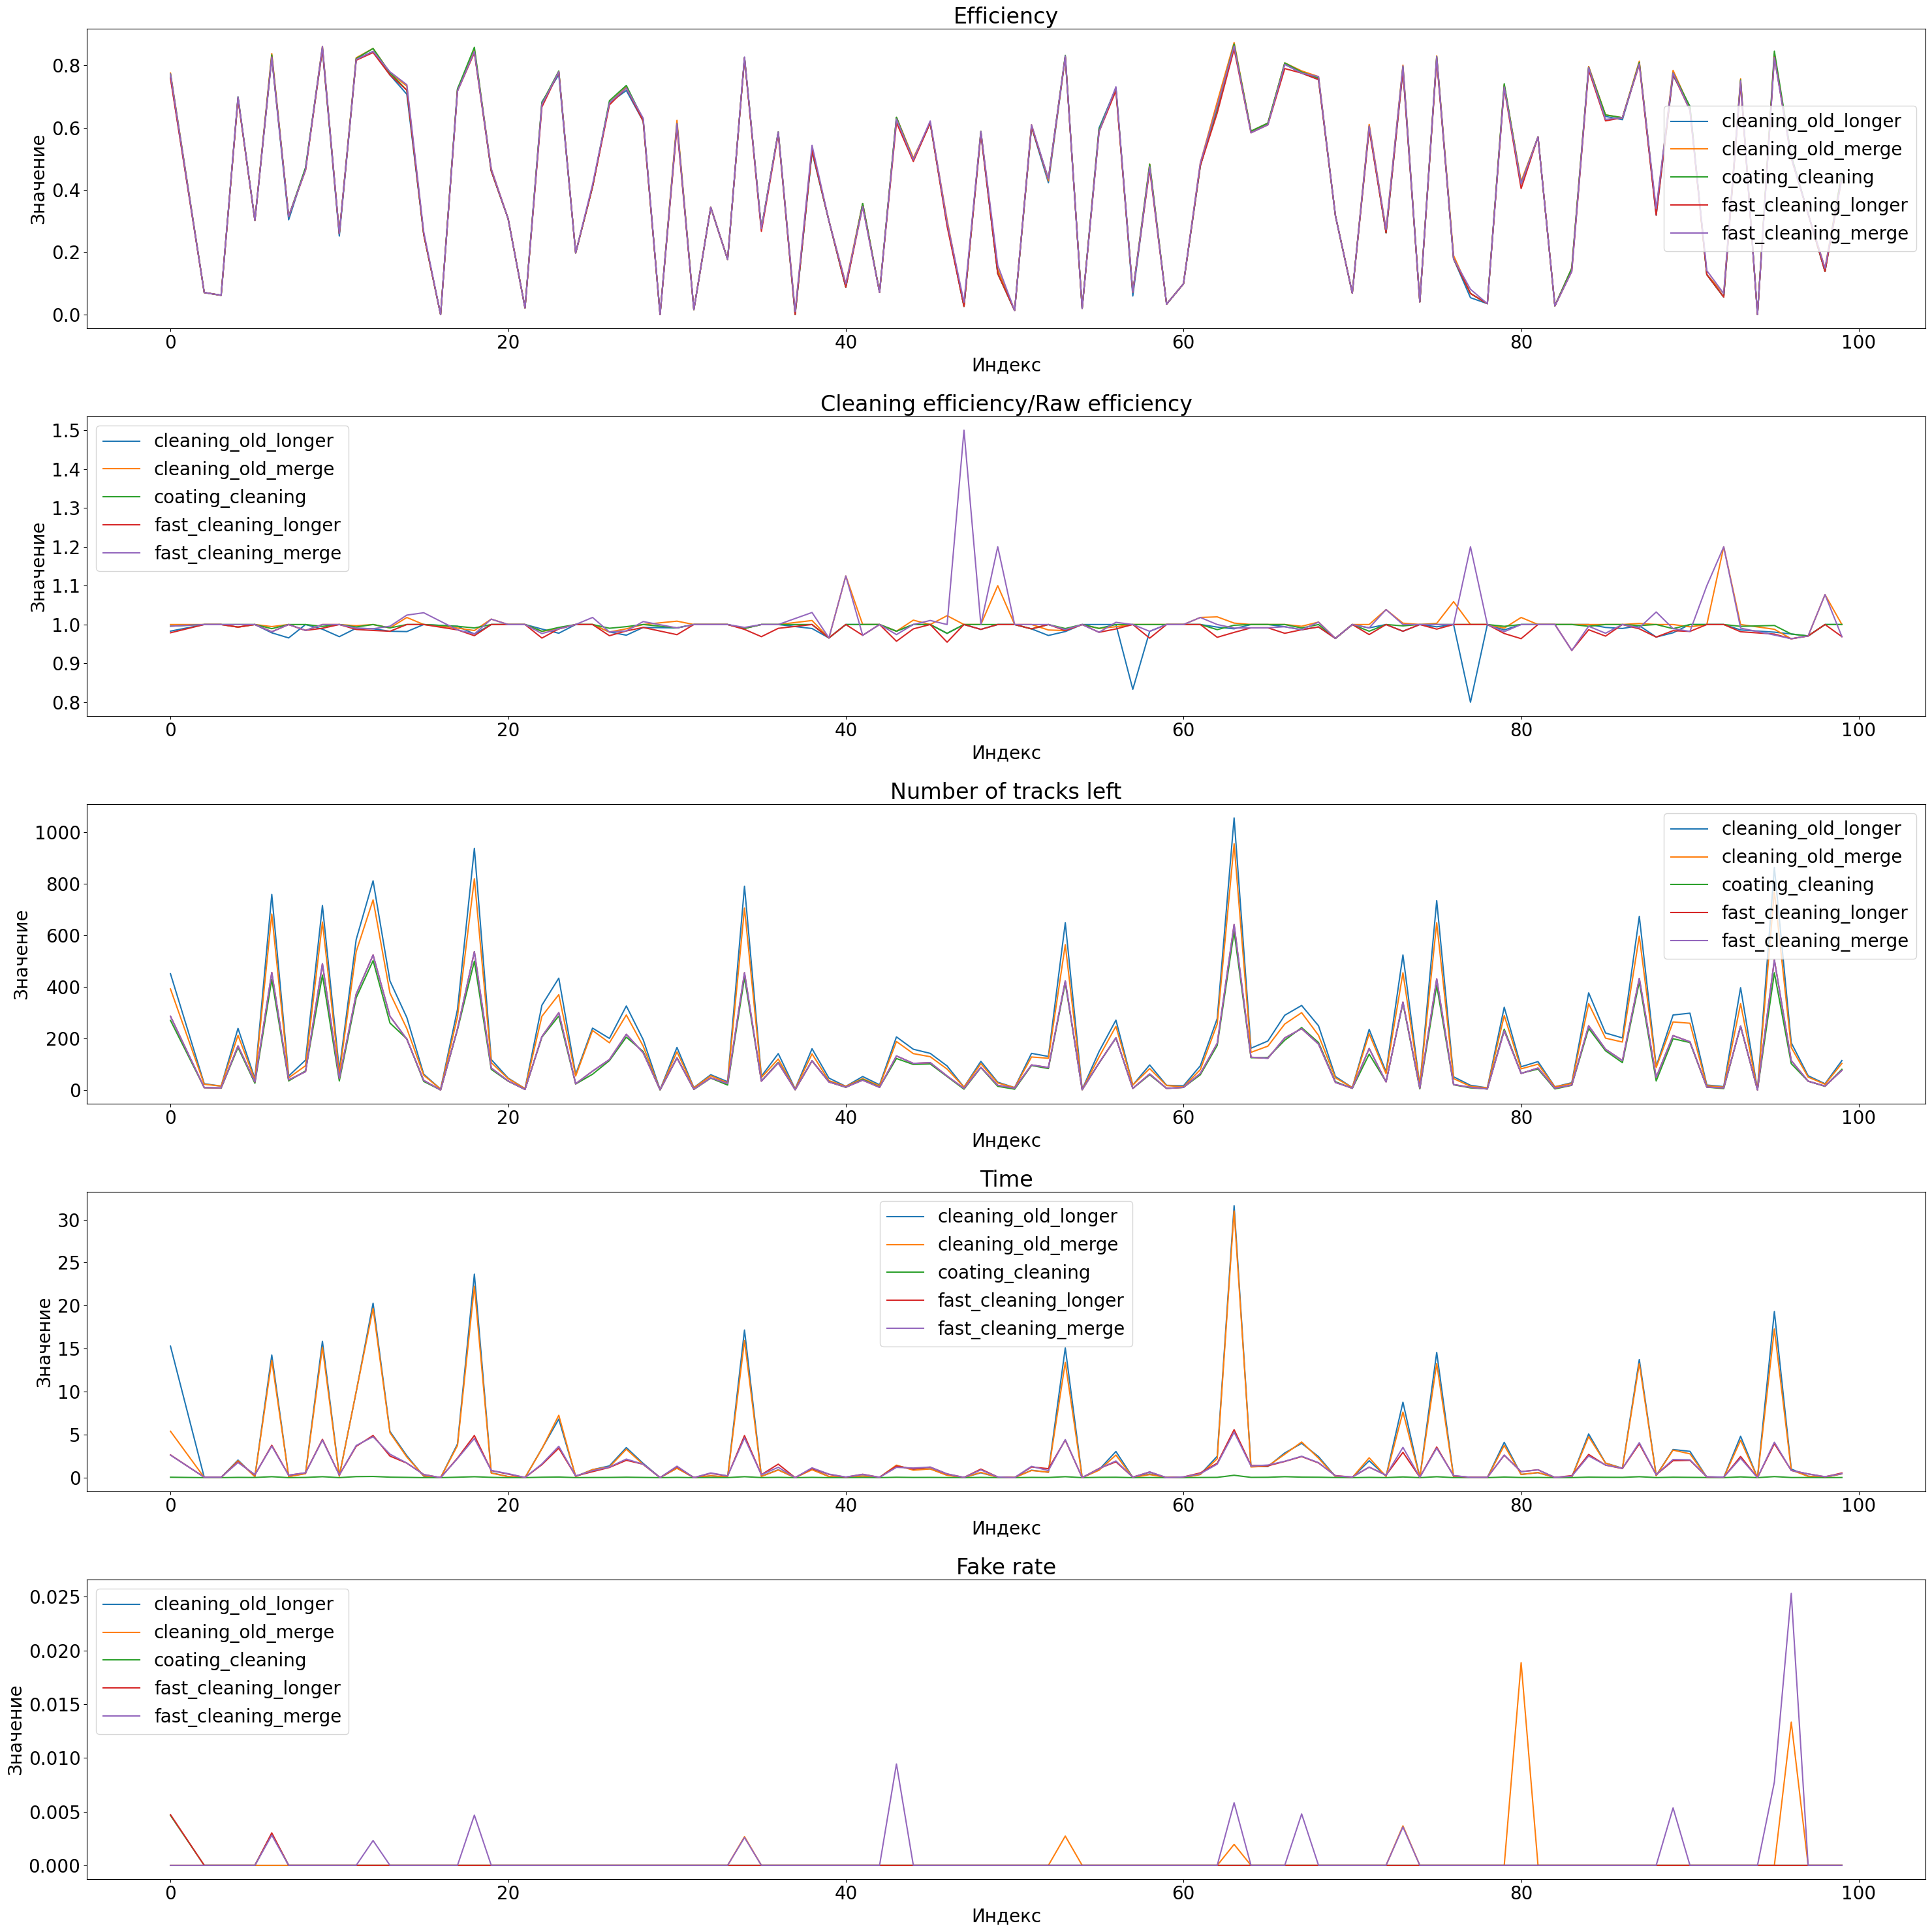

In [10]:
matplotlib.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(5, 1, figsize=(30, 30))

for i, df in enumerate([df_efficiency, df_normalized_efficiency, df_tracks_number, df_time, df_fake_rate]):
    for column in df.columns.difference(["raw"]):
        axs[i].plot(df.index, df[column], label=column)
    axs[i].set_xlabel("Индекс")
    axs[i].set_ylabel("Значение")
    axs[i].set_title(plot_title[i])
    axs[i].legend()

plt.tight_layout()
plt.show()